In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
)

Load the data

In [2]:
df = pd.read_csv('../data/kickstarter_final_data.csv', index_col=0, low_memory=False)

In [5]:
cols_to_drop = [
    'name',
    'blurb',
    'category',
    'category_grouped',
    'country',
    'country_grouped',
    'currency',
    'currency_grouped',
    'deadline_weekday',
    'state_changed_at_weekday',
    'created_at_weekday',
    'launched_at_weekday'
]

existing = [c for c in cols_to_drop if c in df.columns]

df.drop(columns=existing, inplace=True)



In [7]:
df.columns

Index(['goal', 'disable_communication', 'deadline', 'created_at',
       'launched_at', 'static_usd_rate', 'name_len_clean', 'blurb_len_clean',
       'deadline_month', 'deadline_day', 'deadline_hr', 'created_at_month',
       'created_at_day', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
       'create_to_launch_days', 'launch_to_deadline_days', 'SuccessfulBool',
       'TOPCOUNTRY', 'LaunchedTuesday', 'DeadlineWeekend', 'app', 'help',
       'new', 'world', 'canceled', 'country_grouped_CA', 'country_grouped_GB',
       'country_grouped_Other', 'country_grouped_US', 'currency_grouped_CAD',
       'currency_grouped_EUR', 'currency_grouped_GBP',
       'currency_grouped_Other', 'currency_grouped_USD',
       'deadline_weekday_Friday', 'deadline_weekday_Monday',
       'deadline_weekday_Saturday', 'deadline_weekday_Sunday',
       'deadline_weekday_Thursday', 'deadline_weekday_Tuesday',
       'deadline_weekday_Wednesday', 'created_a

In [6]:
features_to_drop = ['usd_pledged', 'state_changed_at', 'staff_pick', 'backers_count', 'spotlight', 'launch_to_state_change_days', 'state_changed_at_weekday_Friday', 'state_changed_at_weekday_Monday', 'state_changed_at_weekday_Saturday', 'state_changed_at_weekday_Sunday', 'state_changed_at_weekday_Thursday', 'state_changed_at_weekday_Tuesday', 'state_changed_at_weekday_Wednesday']
print(df.columns.to_list())

def safe_drop_columns(df, features_to_drop):
    for column in features_to_drop:
        if column in df.columns.tolist():
            df.drop(column, axis=1, inplace=True)
safe_drop_columns(df, features_to_drop)

['goal', 'disable_communication', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate', 'usd_pledged', 'spotlight', 'name_len_clean', 'blurb_len_clean', 'deadline_month', 'deadline_day', 'deadline_hr', 'created_at_month', 'created_at_day', 'created_at_hr', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr', 'create_to_launch_days', 'launch_to_deadline_days', 'launch_to_state_change_days', 'SuccessfulBool', 'TOPCOUNTRY', 'LaunchedTuesday', 'DeadlineWeekend', 'app', 'help', 'new', 'world', 'canceled', 'country_grouped_CA', 'country_grouped_GB', 'country_grouped_Other', 'country_grouped_US', 'currency_grouped_CAD', 'currency_grouped_EUR', 'currency_grouped_GBP', 'currency_grouped_Other', 'currency_grouped_USD', 'deadline_weekday_Friday', 'deadline_weekday_Monday', 'deadline_weekday_Saturday', 'deadline_weekday_Sunday', 'deadline_weekday_Thursday', 'deadline_weekday_Tuesday', 'deadline_weekday_Wednesday', 'sta

Accuracy: 0.7467894354252483

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83      2923
           1       0.60      0.39      0.47      1204

    accuracy                           0.75      4127
   macro avg       0.69      0.64      0.65      4127
weighted avg       0.73      0.75      0.73      4127


Confusion Matrix:
 [[2610  313]
 [ 732  472]]


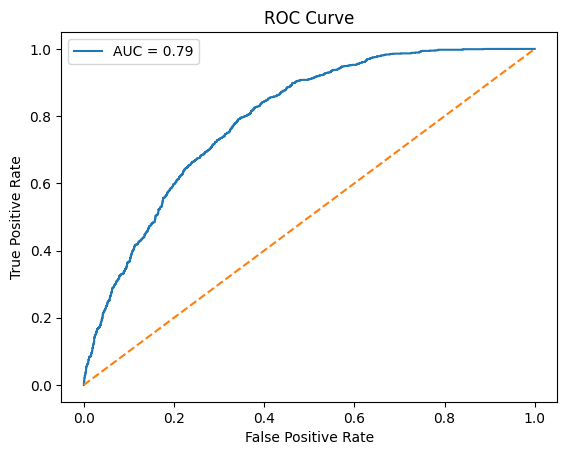

In [ ]:
X = df.drop(columns=['SuccessfulBool', 'deadline', 'created_at', 'launched_at'])
y = df['SuccessfulBool']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

num_cols = ['goal', 'static_usd_rate', 'name_len_clean', 'blurb_len_clean',
            'deadline_month', 'deadline_day', 'deadline_hr',
            'created_at_month', 'created_at_day', 'created_at_hr',
            'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr',
            'create_to_launch_days', 'launch_to_deadline_days']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, f1_score, precision_recall_curve,
    classification_report, confusion_matrix
)

# 0) Assume df is already loaded
# Drop timestamp‐columns you won’t feed into the model
X = df.drop(columns=['SuccessfulBool', 'deadline', 'created_at', 'launched_at'])
y = df['SuccessfulBool']

# 1) Split off test (20%) and then validation (10% of train)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.1, random_state=42, stratify=y_trainval
)

# 2) Define numeric columns to scale
num_cols = [
    'goal', 'static_usd_rate', 'name_len_clean', 'blurb_len_clean',
    'deadline_month', 'deadline_day', 'deadline_hr',
    'created_at_month', 'created_at_day', 'created_at_hr',
    'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr',
    'create_to_launch_days', 'launch_to_deadline_days'
]

# 3) Pipeline: scale then logistic
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000, random_state=42))
])

# 4) Grid of hyperparameters
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2', 'elasticnet'],
    'clf__solver': ['liblinear', 'saga'],          # liblinear supports l1/l2, saga supports elasticnet
    'clf__class_weight': [None, 'balanced'],
    'clf__l1_ratio': [0.0, 0.5, 1.0],               # only used when penalty='elasticnet'
}

# 5) Grid search with 5-fold stratified CV, optimize ROC-AUC
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    pipe, param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV AUC:", grid.best_score_)

# 6) Threshold tuning on the validation set
best_model = grid.best_estimator_
probs_val = best_model.predict_proba(X_val)[:,1]

# compute F1 for a range of thresholds
prec, rec, thresh = precision_recall_curve(y_val, probs_val)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-12)
best_idx   = np.nanargmax(f1_scores)
best_thresh = thresh[best_idx]
print(f"Best threshold for F1 on val: {best_thresh:.3f}, F1 = {f1_scores[best_idx]:.3f}")

# 7) Final evaluation on the test set
probs_test = best_model.predict_proba(X_test)[:,1]
y_pred_test = (probs_test >= best_thresh).astype(int)

print("\n--- Test set performance ---")
print("ROC AUC:", roc_auc_score(y_test, probs_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
